<a href="https://colab.research.google.com/github/NiCo7889/-Examen_Oridinaria_EDA2_enero_Nicolas_Rodriguez/blob/main/Copia_de_Analisis_de_Fourier_1_dominio_temporal_y_de_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='yellow'>**Variable compleja y análisis de Fourier**</font>

<font color='yellow'>**Prof. Ariel Salort**</font>

# <font color='red'>**Análisis de Fourier: Dominio temporal y dominio de frecuencias**</font>

Paquetes que usaremos:

-- **numpy** principalmente para cálculo de transformadas de Fourier, en particular para calcular la FFT, la IFFT, DCT e IDCT.

-- **matplotlib** para realizar gráficos

-- **scipy** es otra opción a numpy para calcular transformadas de Fourier. Usaremos este paquete también para tratar ficheros de sonido.

-- **IPython** lo usaremos para el tratamiento de ficheros de sonido.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from IPython.display import Audio

# <font color='red'> Ondas sinusoidales</font>

Cada onda sinusoidal en el análisis de Fourier está definida por tres parámetros principales:

<font color='orange'> **Frecuencia**:</font> Define cuántas veces por segundo la onda completa un ciclo. En Fourier, la frecuencia de cada onda sinusoidal indica qué tan rápido varía esa componente en la señal original. Las frecuencias bajas representan cambios lentos, mientras que las frecuencias altas representan cambios rápidos.

<font color='orange'> **Amplitud**:</font>  Representa la "intensidad" o "potencia" de la frecuencia dentro de la señal. Una mayor amplitud significa que esa frecuencia tiene una mayor contribución a la forma total de la señal.

<font color='orange'> **Fase**:</font> : Indica el desplazamiento de la onda en el tiempo. La fase determina cómo se alinean las ondas sinusoidales en el tiempo cuando se suman para reconstruir la señal original.

En resumen, una onda sinusoidal tiene la forma
<font color='yellow'>
$$
f(t) = A\cdot \sin(2\pi \cdot f \cdot t+\varphi)
$$
</font>
donde la variable $t\in[0,d]$, $\varphi$ es la fase inicial, $1/f$ el período, $A$ la amplitud, $d$ la duración.

**En el caso de una senal discreta** (en el ordenador) el tiempo será discreto, en este caso $t$ toma $f*d$ valores discretos comprendidos entre $0$ y $d$.

**<font color='lightblue'> Ejercicio:</font>** Graficar diferentes sinusoides y comprender que significan y representan $A$, $1/f$ y $\varphi$.

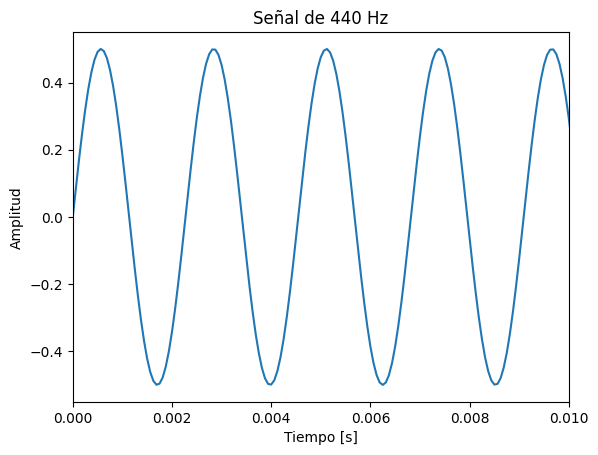

In [2]:
# Parámetros
fs = 16000    # Frecuencia de muestreo
duration = 4  # Duración en segundos
f = 440       # Frecuencia de la señal (Hz), por ejemplo 440 Hz para el La4
p = 0         # fase inicial
A = 0.5       # Amplitud
t = np.linspace(0, duration, int(fs*duration), endpoint=False)  # Vector de tiempo
signal = A * np.sin(2 * np.pi * f * t + p)                      # Onda sinusoidal

write("output.wav", fs, np.float32(signal))   # Guardamos como wav

# Graficar la señal
plt.plot(t, signal)
plt.title("Señal de "+str(f)+" Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.01)  # Mostramos solo los primeros 10 ms para ver la forma de la onda
plt.show()

Audio("output.wav")  # Reproducimos el archivo de audio


# <font color='red'> Frecuencias de muestreo de sonido típicas</font>
Las frecuencias típicas que se utlizan para el muestreo de sonido son las siguientes, medidas en Hz, es decir, muestras por segundo:

- **8 kHz**: **Teléfono** Adecuado para la voz humana pero no para la reproducción musical.  

- **16 kHz**: Usada en aplicaciones de voz de mejor calidad, como la **telefonía VoIP o reconocimiento de voz**.

- **44.1 kHz**: Estándar para audio en CD. Cubre todo el rango audible por los humanos (20 Hz - 20 kHz).

- **48 kHz**: Sonido digital utilizado en la **televisión digital**, **DVD**, **audio profesional**

- **96 kHz a 192 kHz**: HD DVD, Blu-Ray disc

# <font color='red'> Umbral del oído humano</font>

**Frecuencia y Umbral de Audición**

- El rango de frecuencia audible para la mayoría de los humanos está entre 20 Hz y 20 kHz.
- El umbral de audición varía dependiendo de la frecuencia:
 -  Frecuencias de 2 a 5 kHz: El oído humano es más sensible en este rango, y el umbral es más bajo, cerca de 0 dB.
 - Frecuencias bajas (20 Hz - 250 Hz): El umbral de audición es más alto, normalmente alrededor de 30-40 dB SPL.
 - Frecuencias muy altas (>10 kHz): El umbral también aumenta, y los sonidos necesitan ser más fuertes (más decibelios) para ser audibles.

**Umbral de Dolor**

- El umbral del dolor auditivo, o el nivel en el que los sonidos se vuelven físicamente incómodos, es típicamente alrededor de 120-130 dB.
- Esto puede ocurrir a cualquier frecuencia, pero es más común con sonidos fuertes y agudos.

**Tabla de umbrales típicos de audición**:
<div style="text-align: center;">
  <table border="1" cellpadding="10" cellspacing="0" style="margin-left: auto; margin-right: auto;">
    <thead>
      <tr>
        <th>Frecuencia (Hz)</th>
        <th>Umbral de audición (dB)</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>20 Hz</td>
        <td>70-80 dB</td>
      </tr>
      <tr>
        <td>50 Hz</td>
        <td>50-60 dB</td>
      </tr>
      <tr>
        <td>100 Hz</td>
        <td>40-50 dB</td>
      </tr>
      <tr>
        <td>500 Hz</td>
        <td>10-20 dB</td>
      </tr>
      <tr>
        <td>1000 Hz</td>
        <td>0-10 dB</td>
      </tr>
      <tr>
        <td>2000 Hz</td>
        <td>0-5 dB</td>
      </tr>
      <tr>
        <td>4000 Hz</td>
        <td>0-5 dB</td>
      </tr>
      <tr>
        <td>8000 Hz</td>
        <td>10-20 dB</td>
      </tr>
      <tr>
        <td>16000 Hz</td>
        <td>50-60 dB</td>
      </tr>
    </tbody>
  </table>
</div>



**Amplitud y decibelios**
La amplitud de la onda puede reescribirse en término de decibeles (db) mediante la fórmula:
<font color='yellow'>
$$
A = P_0 10^{L_{db}/20}
$$
</font>
donde $P_0$ es el umbral de audición, comunmente $20 \mu PA = 20 \times 10^{-6}$ y $L_{db}$ es el nivel deseado de decibelios.

**<font color='lightblue'> Ejercicio:</font>** Variar los parámetros de los decibelios y las frecuencias, y oir el sonido resultante.

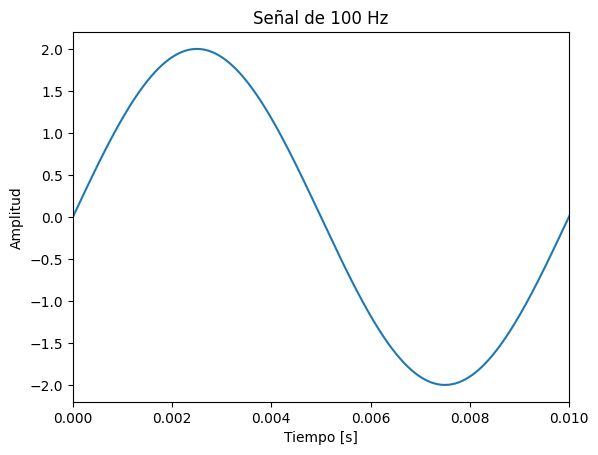

In [ ]:
# Parámetros
fs = 44100    # Frecuencia de muestreo
duration = 4  # Duración en segundos
f = 100       # Frecuencia de la señal (Hz), por ejemplo 440 Hz para el La4
p = 0         # fase inicial
L_db = 100    # decibelios
A = 20e-6 * 10**(L_db / 20)  # amplitud en términos de los decibelios
t = np.linspace(0, duration, int(fs*duration), endpoint=False)  # Vector de tiempo
signal = A * np.sin(2 * np.pi * f * t + p)                      # Onda sinusoidal

write("output.wav", fs, np.float32(signal))   # Guardamos como wav

# Graficamos la señal
plt.plot(t, signal)
plt.title("Señal de "+str(f)+" Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.01)   # Mostramos solo los primeros 10 ms para ver la forma de la onda
plt.show()

Audio("output.wav") # Reproducimos el archivo de audio

# <font color='red'> Notas musicales</font>

A continuación, vemos por ejemplo las frecuencias de las notas en la cuarta octava:

<table border="1" cellpadding="10" cellspacing="0" style="margin: 0 auto; text-align: center;">
  <thead>
    <tr>
      <th>Nota</th>
      <th>Frecuencia (Hz)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Do (C4)</td>
      <td>261.63</td>
    </tr>
    <tr>
      <td>Re (D4)</td>
      <td>293.66</td>
    </tr>
    <tr>
      <td>Mi (E4)</td>
      <td>329.63</td>
    </tr>
    <tr>
      <td>Fa (F4)</td>
      <td>349.23</td>
    </tr>
    <tr>
      <td>Sol (G4)</td>
      <td>392.00</td>
    </tr>
    <tr>
      <td>La (A4)</td>
      <td>440.00</td>
    </tr>
    <tr>
      <td>Si (B4)</td>
      <td>493.88</td>
    </tr>
  </tbody>
</table>

**<font color='lightblue'> Para pensar:</font>** ¿qué es lo que diferenciará el LA de un piano con el LA de una guitarra, por ejemplo? Ambos tienen la misma frecuencia.

Primero generamos una frecuencia de f=440 Hz, con un muestreo de fs=16000 y una duración de d=4 segundos.


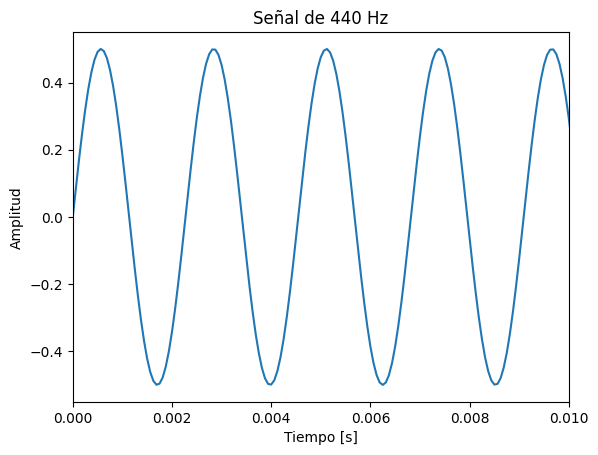

In [ ]:
# Parámetros
fs = 16000    # Frecuencia de muestreo
duration = 4  # Duración en segundos
f = 440       # Frecuencia de la señal (Hz), por ejemplo 440 Hz para el La4
A = 0.5       # Amplitud
t = np.linspace(0, duration, int(fs*duration), endpoint=False)  # Vector de tiempo
signal = A * np.sin(2 * np.pi * f * t)                          # Onda sinusoidal

write("output.wav", fs, np.float32(signal))   # Guardamos como wav

# Graficamos la señal
plt.plot(t, signal)
plt.title("Señal de "+str(f)+" Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.01)  # Mostramos solo los primeros 10 ms para ver la forma de la onda
plt.show()

Audio("output.wav") # Reproducimos el archivo de audio

Ahora vamos a generar dos señales, una de $f_1 = 440$Hz con amplitud $A_1=0.5$ y otra de $f_2=293$Hz y amplitud $A_2=0.4$, y las vamos a sumar. Estamos obteniendo una nueva señal
<font color='yellow'>

$$
A_1 \sin(2\pi f_1 t ) + A_2 \sin(2\pi f_2 t )
$$
</font>


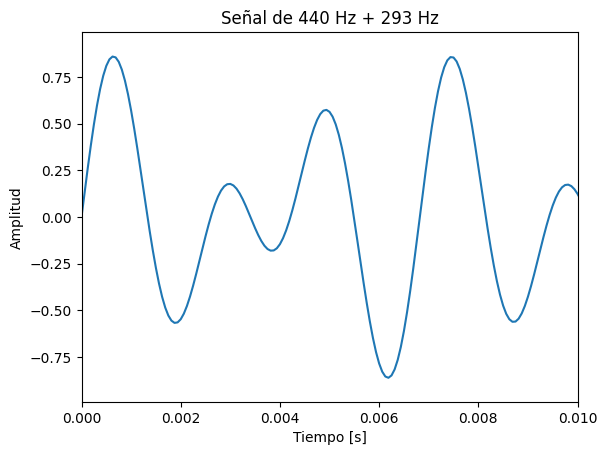

In [ ]:
fs = 16000    # Frecuencia de muestreo
duration = 4  # Duración en segundos
f1 = 440
f2 = 293
A1 = 0.5
A2 = 0.4
t = np.linspace(0, duration, int(fs*duration), endpoint=False)  # Vector de tiempo
signal1 = A1 * np.sin(2 * np.pi * f1 * t)  # Primera señal
signal2 = A2 * np.sin(2 * np.pi * f2 * t)  # Segunda señal
signal = signal1 + signal2                 # Suma de ambas señales

write("output.wav", fs, np.float32(signal))   # Guardar como wav

# Graficamos la señal
plt.plot(t, signal)
plt.title("Señal de "+str(f1)+" Hz + "+str(f2)+" Hz" )
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.01)  # Mostramos solo los primeros 10 ms para ver la forma de la onda
plt.show()

# Reproducimos el archivo de audio
Audio("output.wav")


# <font color='red'> Obtención de las frecuencias de una señal</font>

Veremos que mediante algún tipo de **transformada de Fourier** podremos observar a las señales en el dominio de las frecuencias, es decir, ver que frecuencias contribuyen a su composición.

Para ello utilizaremos:

<font color='yellow'> **Series de Fourier**:</font>

**Para señales periódicas.** La serie de Fourier se utiliza cuando tienes una señal periódica, es decir, una señal que se repite en intervalos de tiempo regulares. Se obtiene una **representación en frecuencias discretas**.

<font color='yellow'> **Transformada de Fourier**:</font>

**Para señales no periódicas o de duración finita.** La transformada de Fourier es útil para señales que no son periódicas o que tienen duración finita. En este caso, no se puede definir un periodo, por lo que la serie de Fourier no es aplicable. Se obtiene una **representación en frecuencias continuas**.

<font color='orange'> **Señales continuas vs señales discretas**:</font>
Cuando analizamos señales digitales, los datos de la señal son discretos. Por esta razón, al estudiar el espectro de una señal en una computadora, empleamos la **Transformada Discreta de Fourier (DFT)**. La DFT toma como entrada una muestra de una señal continua y produce un conjunto discreto de frecuencias que componen esa señal digital. Existen algoritmos optimizados para calcular la DFT de forma eficiente; en particular, utilizaremos el algoritmo de la **Transformada Rápida de Fourier (FFT)**.



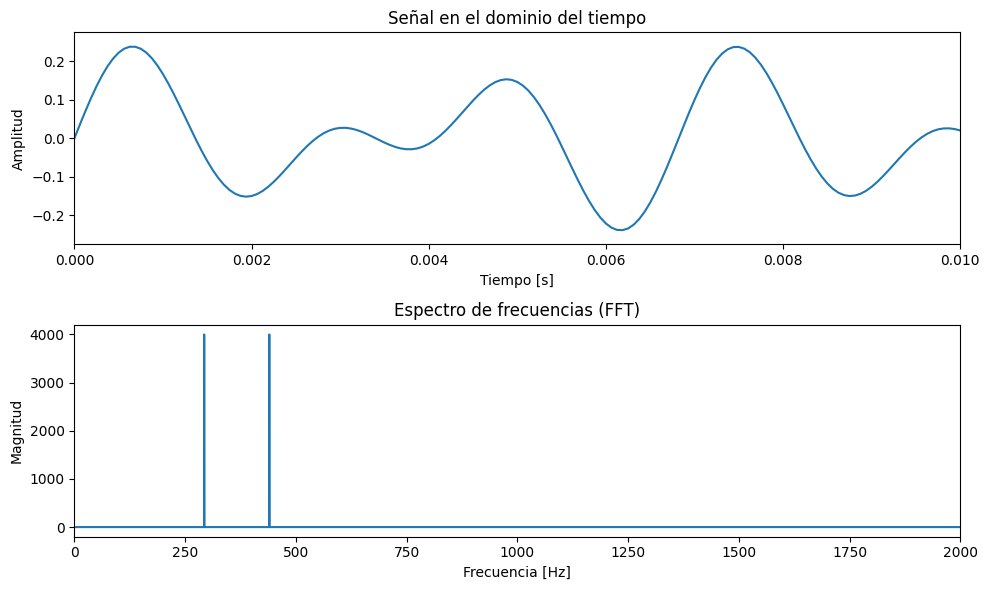

In [ ]:
# Aplicamos la Transformada de Fourier a la señal
fft_signal = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_signal), 1/fs)

# Obtenemos el espectro de magnitudes (valor absoluto de la FFT)
magnitude_spectrum = np.abs(fft_signal)

# Graficamos la señal con ruido en el dominio del tiempo
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Señal en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.01)  # Mostramos solo los primeros 10 ms

# Mostramos la FFT (espectro de frecuencias) solo la mitad positiva
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], magnitude_spectrum[:len(frequencies)//2])
plt.title("Espectro de frecuencias (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0, fs/8)  # Mostramos el espectro hasta un octavo de la frecuencia de muestreo (fs/8)

plt.tight_layout()
plt.show()

# <font color='red'> Adición de ruido aleatorio</font>

Ahora a esa onda, le vamos a agregar ruido aleatorio

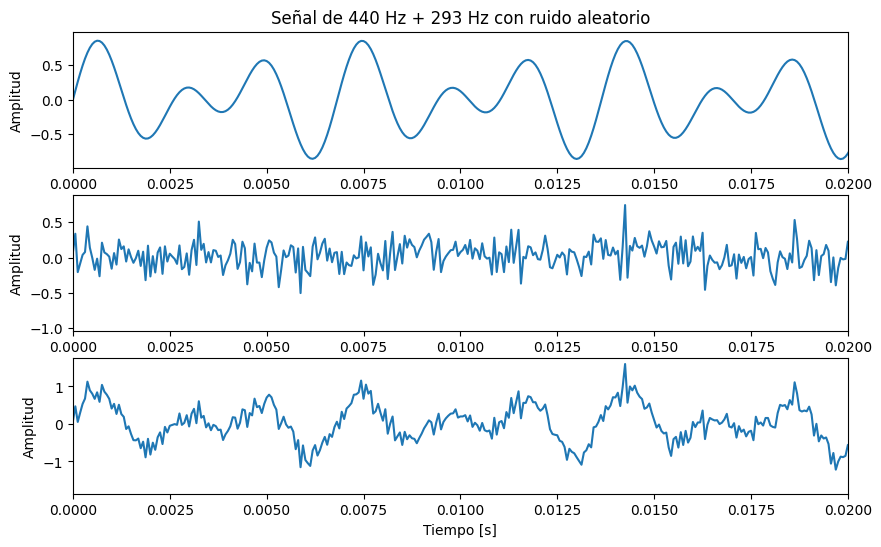

In [ ]:
# Parámetros
fs = 16000    # Frecuencia de muestreo
duration = 4  # Duración en segundos
f1 = 440
f2 = 293
A1 = 0.5
A2 = 0.4
t = np.linspace(0, duration, int(fs*duration), endpoint=False)  # Vector de tiempo
signal1 = A1 * np.sin(2 * np.pi * f1 * t)  # Primera señal
signal2 = A2 * np.sin(2 * np.pi * f2 * t)  # Segunda señal
signal = signal1 + signal2                 # Suma de ambas señales

noise = 0.2 * np.random.normal(0, 1, signal.shape)  # Agregamos ruido aleatorio
signal_noisy = signal + noise

write("output.wav", fs, np.float32(noise))          # Guardamos como wav
write("output.wav", fs, np.float32(signal_noisy))   # Guardamos como wav

# Graficamos la señal
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title("Señal de "+str(f1)+" Hz + "+str(f2)+" Hz con ruido aleatorio" )
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.02)  # Mostramos solo los primeros 10 ms para ver la forma de la onda

plt.subplot(3, 1, 2)
plt.plot(t, noise)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.02)  # Mostramos solo los primeros 10 ms para ver la forma de la onda

plt.subplot(3, 1, 3)
plt.plot(t, signal_noisy)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.02)  # Mostramos solo los primeros 10 ms para ver la forma de la onda
plt.show()

# Reproducir el archivo de audio
Audio("output.wav")


Analizamos las frecuencias de la onda de sonido con el ruido aleatorio

**<font color='lightblue'> Ejercicio:</font>** Vemos que a pesar del ruido que agregamos, la frecuencias dominantes son las del la señal original. Modificar la amplitud del ruido y ver que ocurre.

**<font color='lightblue'> Ejercicio:</font>** Realizar un programa que quite el ruido y recupere la señal original. Para ello, eliminar todas las frecuencias que están por debajo de cierto rango de valores.

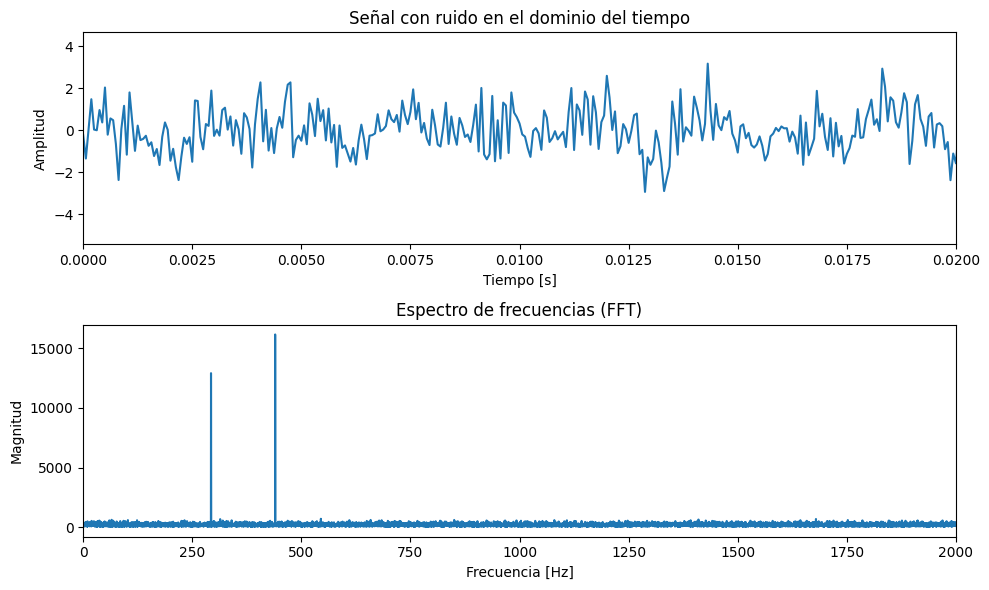

In [ ]:
# Aplicamos la Transformada de Fourier a la señal con ruido
fft_signal_noisy  = np.fft.fft(signal_noisy)
frequencies_noisy = np.fft.fftfreq(len(fft_signal_noisy), 1/fs)
magnitude_spectrum_noisy = np.abs(fft_signal_noisy)

# Graficamos la señal con ruido en el dominio del tiempo
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal_noisy)
plt.title("Señal con ruido en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 0.02)  # Mostramos solo los primeros 20 ms

# Graficamos la FFT (espectro de frecuencias) solo la mitad positiva
plt.subplot(2, 1, 2)
plt.plot(frequencies_noisy[:len(frequencies_noisy)//2], magnitude_spectrum_noisy[:len(frequencies_noisy)//2])
plt.title("Espectro de frecuencias (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0, fs/8)  # Mostramos el espectro hasta un octavo de la frecuencia de muestreo (fs/8)

plt.tight_layout()
plt.show()